In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
Data = pd.read_csv('tcpstate.csv')

In [3]:
Data

,Tempo,N pacotes,Tamanho mp/bytes,bits por seg
0,5,30,359.23,8621.6
1,15,131,174.11,18246.4
2,25,653,529.44,276578.4
3,35,1293,1287.94,1332248.8
4,45,106,463.74,39324.8
...,...,...,...,...
561,5615,367,242.09,71076.8
562,5625,407,241.62,78672.0
563,5635,409,237.78,77800.0
564,5645,356,266.80,75985.6


Text(0, 0.5, 'Frequencia')

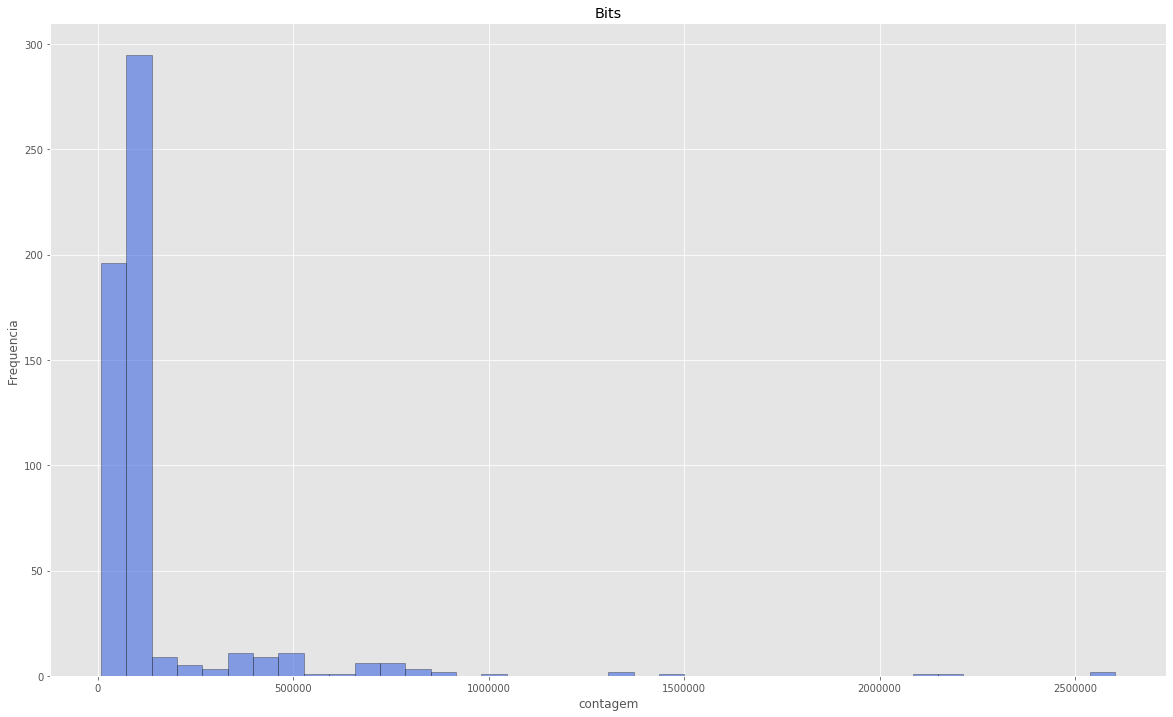

In [4]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
Data["bits por seg"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Bits")
plt.xlabel("contagem")
plt.ylabel("Frequencia")

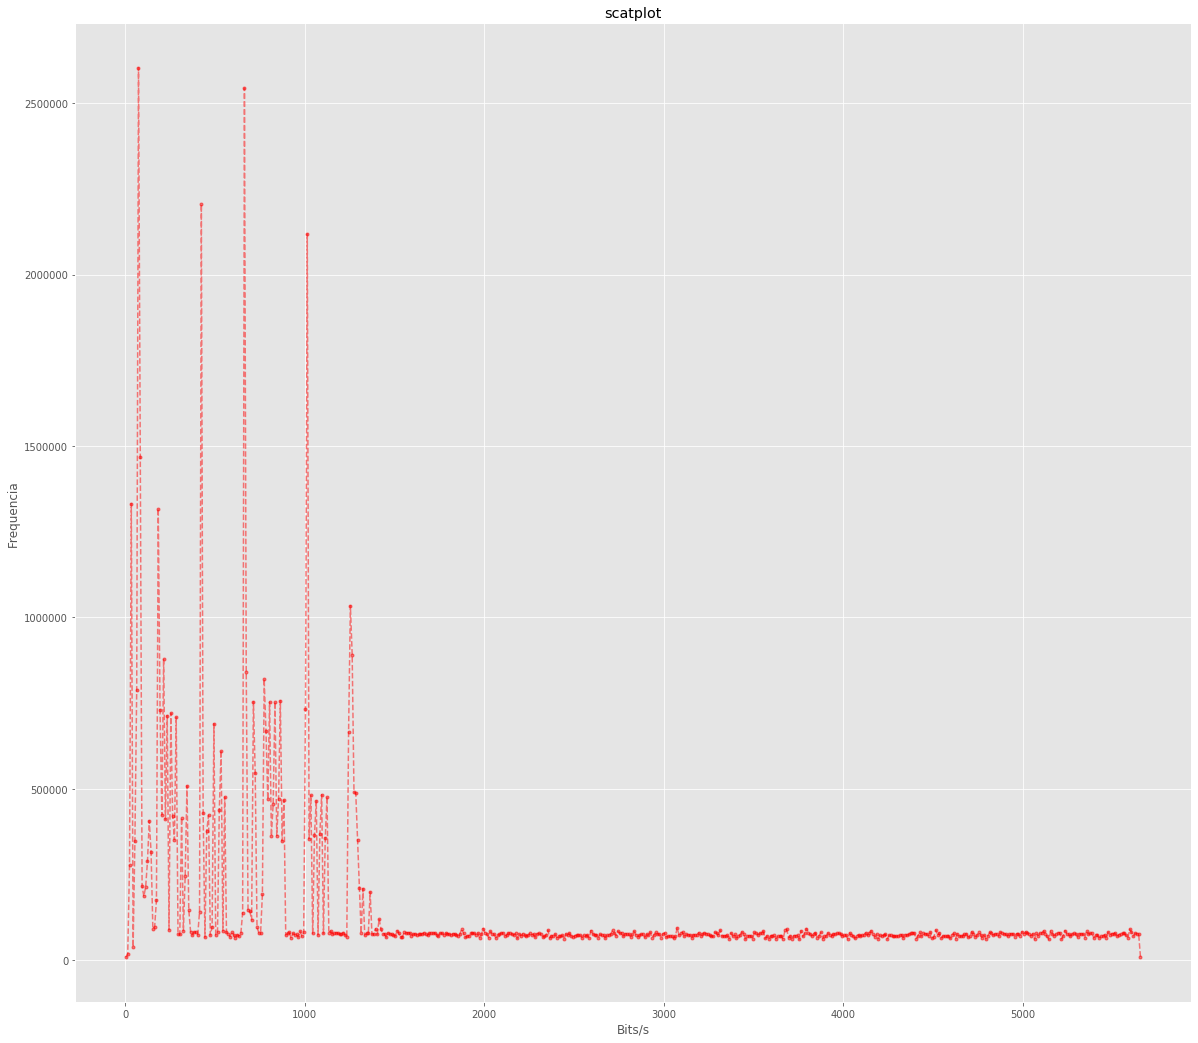

In [5]:
x = Data['Tempo']
y = Data['bits por seg']

# Titulo gráfico
plt.figure( figsize=(20, 18))
plt.title('scatplot')

# grid gráfico

plt.grid(True)

# nome dos eixos x e y .
plt.xlabel('Bits/s')
plt.ylabel('Frequencia')

# linestyle ou ls - altera o tipo de linha
# color - altera as cores da linha
# marker - altera o tipo de marcador (circulos, triangulos, setas, etc)

plt.plot(x,y, 'go', color='red', ls='--', marker='.',alpha=0.5, )


In [6]:
Data.describe()

,Tempo,N pacotes,Tamanho mp/bytes,bits por seg
count,566.000000,566.000000,566.000000,5.660000e+02
mean,2830.000000,366.118375,438.549965,1.446316e+05
std,1635.344001,157.736854,506.432634,2.561798e+05
min,5.000000,30.000000,174.110000,8.621600e+03
25%,1417.500000,283.000000,243.462500,7.159780e+04
50%,2830.000000,356.000000,288.850000,7.641200e+04
75%,4242.500000,421.000000,366.450000,8.077460e+04
max,5655.000000,2444.000000,5255.740000,2.603101e+06


In [7]:

# Frequency
stats_df = Data.groupby('bits por seg')['bits por seg'].agg('count').pipe(pd.DataFrame).rename(columns = {'bits por seg': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,bits por seg,frequency,pdf,cdf
0,8621.6,1,0.001767,0.001767
1,9649.6,1,0.001767,0.003534
2,18246.4,1,0.001767,0.005300
3,39324.8,1,0.001767,0.007067
4,61015.2,1,0.001767,0.008834
...,...,...,...,...
556,1466647.2,1,0.001767,0.992933
557,2118508.8,1,0.001767,0.994700
558,2204628.0,1,0.001767,0.996466
559,2543777.6,1,0.001767,0.998233


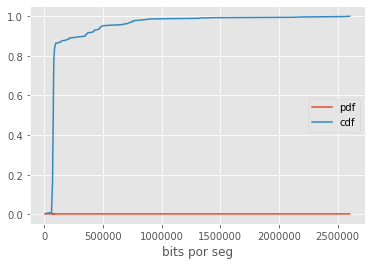

In [8]:
stats_df.plot(x = 'bits por seg', y = ['pdf', 'cdf'], grid = True)


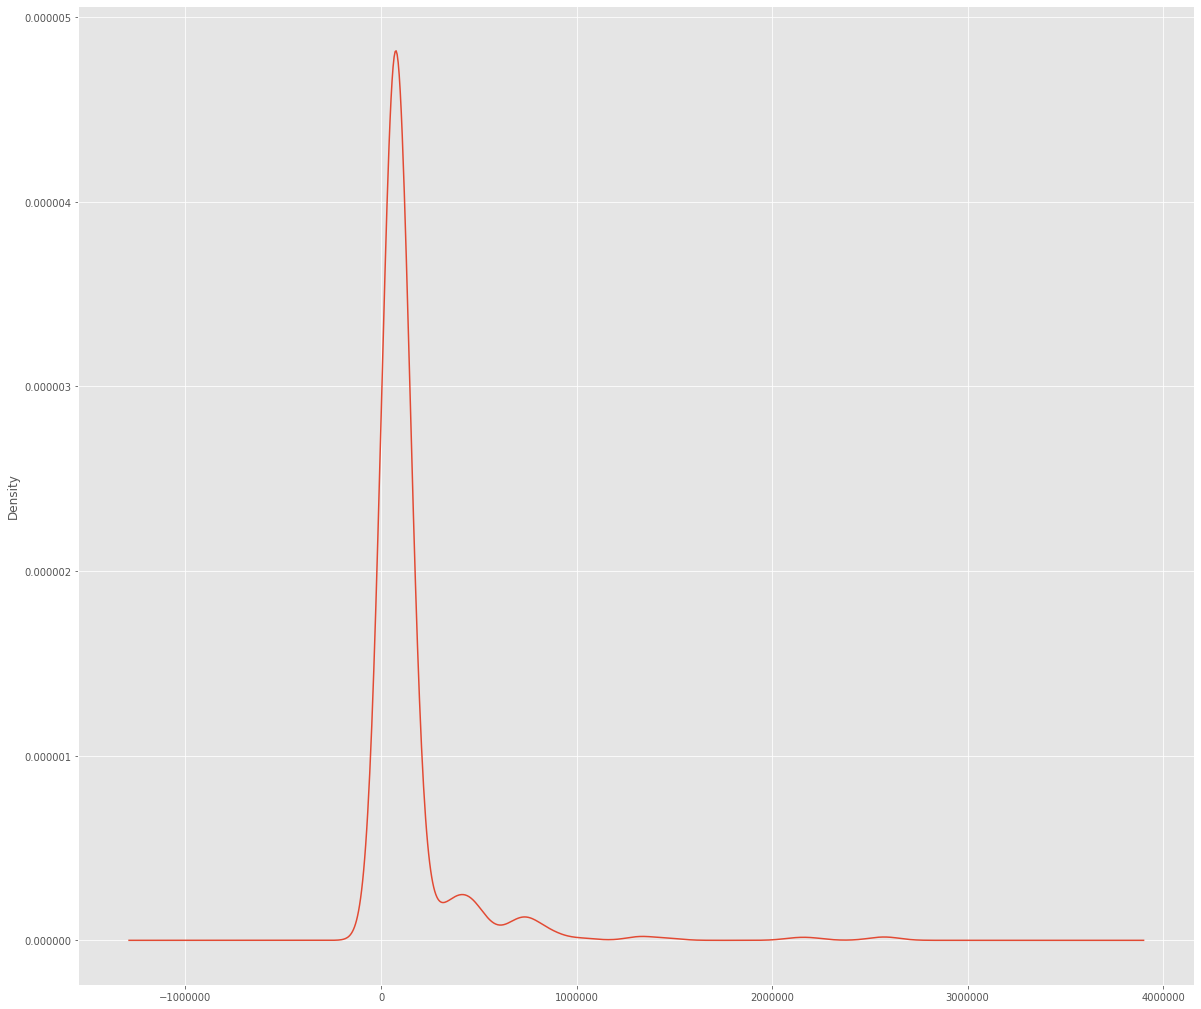

In [9]:
plt.figure( figsize=(20, 18))

Data['bits por seg'].plot.kde()


In [10]:
#coeficiente de person
def Person(media, moda, dp):
    return (media - moda) / dp
#coeficiente de bowley
def Bowley(q1, md, q3):
    return ((q3-md) - (md-q1)) / (q3 - q1)
q1, md, q3 = Data['bits por seg'].quantile([0.25, 0.50, 0.75])

print("Bowley: {:.2f}".format( Bowley(q1, md, q3) ))
print("Person: {:.2f}".format( Person(Data['bits por seg'].mean(), Data['bits por seg'].mode(), Data['bits por seg'].std())[0] ))

Bowley: -0.05
Person: 0.29


In [28]:
TotalBits = Data['bits por seg'].sum()
TotalPacotes = Data['N pacotes'].sum()
minu = Data['bits por seg'].min()
maxu = Data['bits por seg'].max()
media = round(Data['bits por seg'].mean(),2)
mediana = Data['bits por seg'].median()
q1 = mediana/2
q3 = mediana*3/2
#variancia 
variancia = Data['bits por seg'].var()
#desvio padrão
desvio =round( np.sqrt(Data['bits por seg'].var()),2)
desvio_absoluto = round(Data['bits por seg'].mad(),2)

print('Sumariu do data de bit/ squartis')
print(' Carga total de bits é     : ', TotalBits)
print(' Número total de pacotes é : ', TotalPacotes)
print(' Valor minimo é            : ', minu)
print(' Valor maximo é            : ', maxu)
print(' Valor da media é          : ', media)
print(' Valor valor da mediana é  : ', mediana)
print(' Valor q1 é                : ', q1)
print(' Valor q3 é                : ', q3)
print(' Valor da variancia é      : ', variancia)
print(' Desvio padrão é           : ', desvio)
print(' Desvio_absoluto é         : ', desvio_absoluto)

Sumariu do data de bit/ squartis
 Carga total de bits é     :  81861509.6
 Número total de pacotes é :  207223
 Valor minimo é            :  8621.6
 Valor maximo é            :  2603100.8
 Valor da media é          :  144631.64
 Valor valor da mediana é  :  76412.0
 Valor q1 é                :  38206.0
 Valor q3 é                :  114618.0
 Valor da variancia é      :  65628067468.73184
 Desvio padrão é           :  256179.76
 Desvio_absoluto é         :  121238.77


In [27]:
#error <- qnorm(0.95)*sd(dados$num_pac)/sqrt(nrow(dados))
sd= Data['N pacotes'].std()
raiz= np.sqrt(len(Data))
error = norm.ppf(0.95) * sd / raiz
#left <- mean(dados$num_pac) - error
left = (Data['N pacotes'].mean()) - error
#right <- mean(dados$num_pac) + error
right =(Data['N pacotes'].mean()) + error
print('Intervalo de confiança - 95% ', error )
print(' left ', left,' right ', right)

Intervalo de confiança - 95%  10.905666595243671
 left  355.21270796306027  right  377.02404115354756


Text(0, 0.5, 'Frequencia')

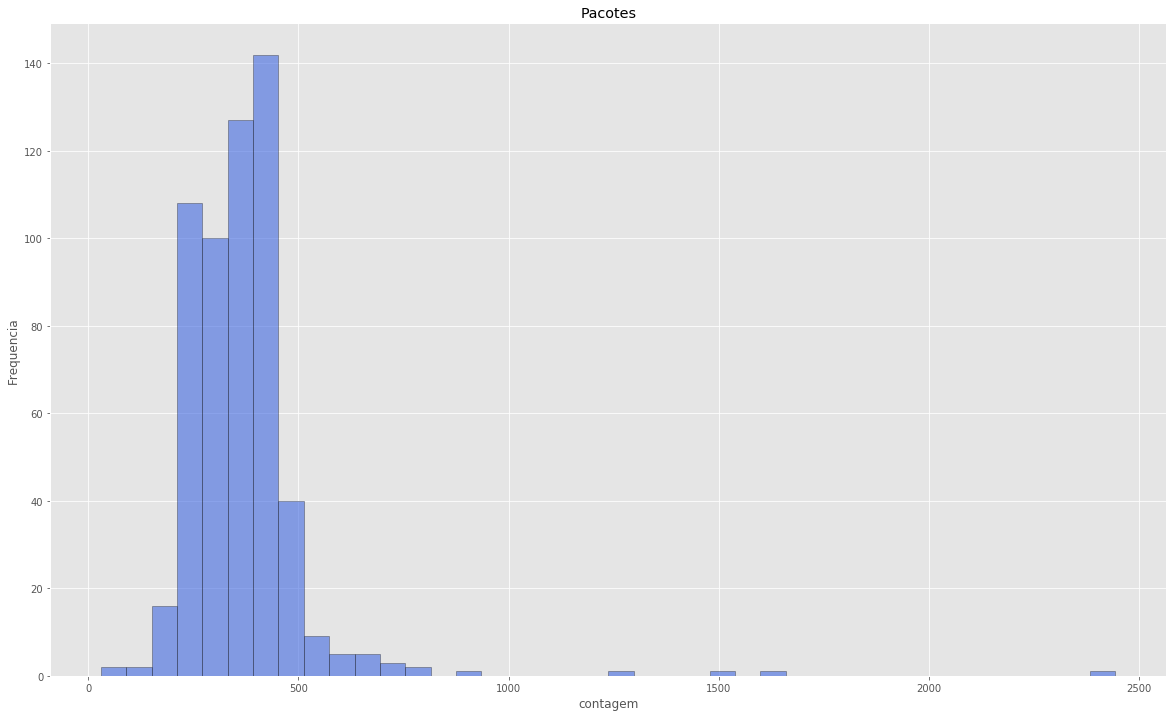

In [12]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
Data['N pacotes'].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Pacotes")
plt.xlabel("contagem")
plt.ylabel("Frequencia")

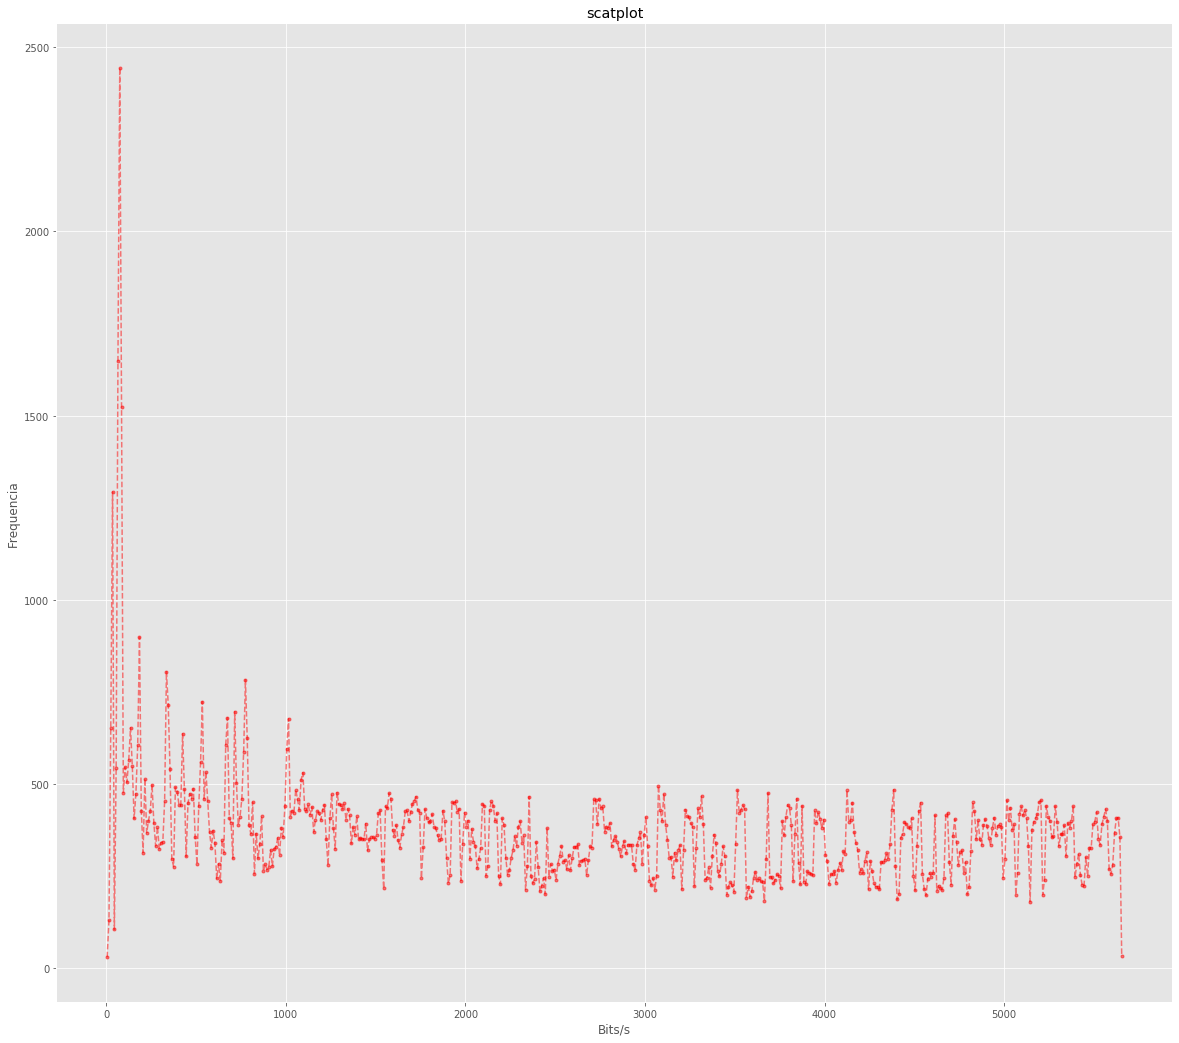

In [13]:
x2 = Data['Tempo']
y2 = Data['N pacotes']

# Titulo gráfico
plt.figure( figsize=(20, 18))
plt.title('scatplot')

# grid gráfico

plt.grid(True)

# nome dos eixos x e y .
plt.xlabel('Bits/s')
plt.ylabel('Frequencia')

# linestyle ou ls - altera o tipo de linha
# color - altera as cores da linha
# marker - altera o tipo de marcador (circulos, triangulos, setas, etc)

plt.plot(x2,y2, 'go', color='red', ls='--', marker='.',alpha=0.5, )

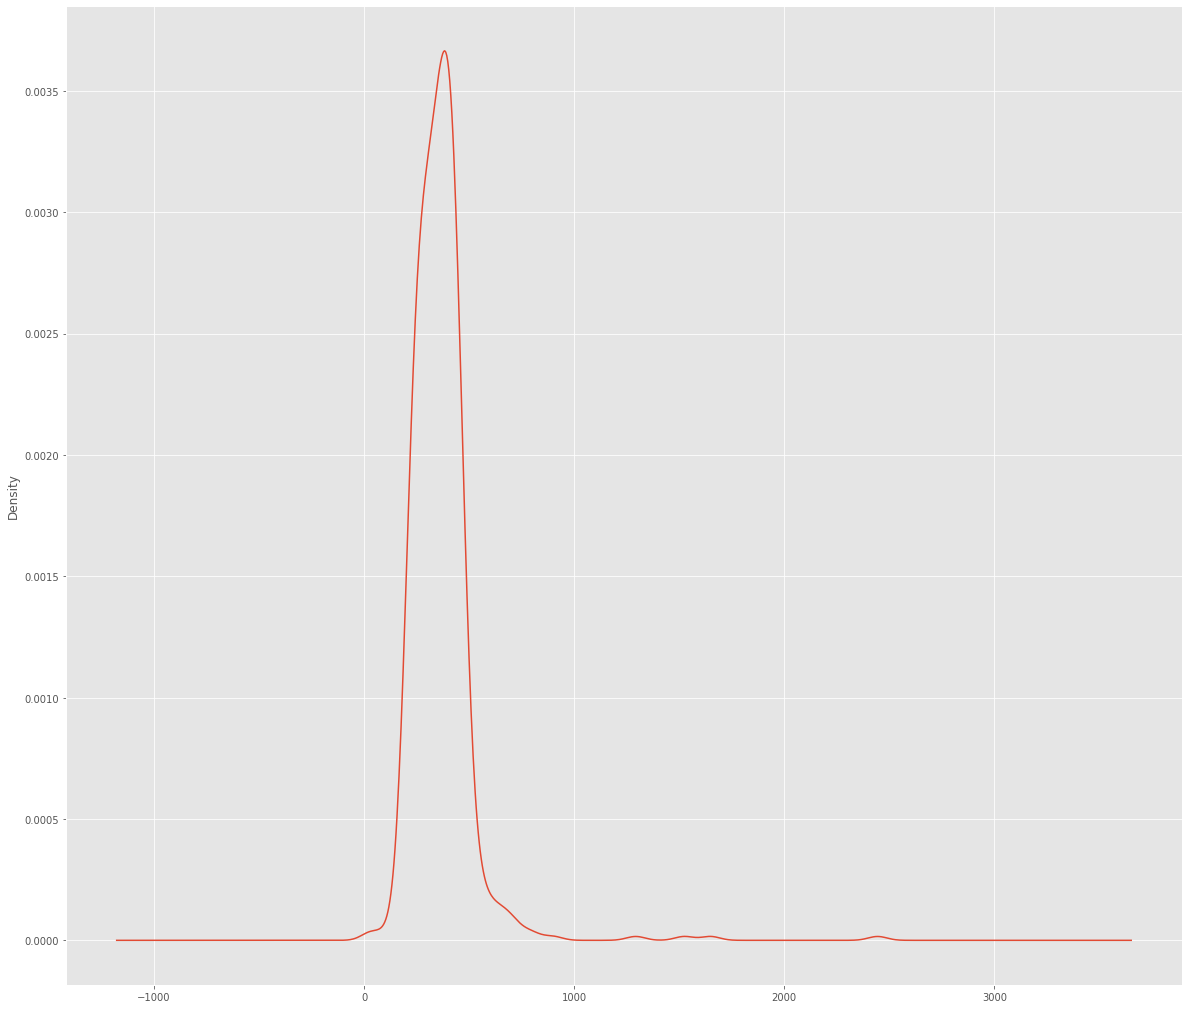

In [14]:
plt.figure( figsize=(20, 18))

Data['N pacotes'].plot.kde()

In [15]:
minu2 = Data['N pacotes'].min()
maxu2 = Data['N pacotes'].max()
media2 = round(Data['N pacotes'].mean(),2)
mediana2 = Data['N pacotes'].median()
q12 = mediana/2
q32 = mediana*3/2
#variancia 
variancia2 = Data['N pacotes'].var()
#desvio padrão
desvio2 = np.sqrt(Data['N pacotes'].var())
desvio_absoluto2 = Data['N pacotes'].mad()

print('Sumariu do data de bit/ squartis')
print(' Valor minimo é: ', minu2)
print(' Valor maximo é: ', maxu2)
print(' Valor da media é: ', media2)
print(' Valor valor da mediana é: ', mediana2)
print(' Valor q1 é: ', q12)
print(' Valor q3 é: ', q32)
print(' Valor da variancia é: ', variancia2)
print(' Desvio padrão é : ', desvio2)
print(' Desvio_absoluto é ', desvio_absoluto2)

Sumariu do data de bit/ squartis
 Valor minimo é:  30
 Valor maximo é:  2444
 Valor da media é:  366.12
 Valor valor da mediana é:  356.0
 Valor q1 é:  38206.0
 Valor q3 é:  114618.0
 Valor da variancia é:  24880.91516620283
 Desvio padrão é :  157.73685417873284
 Desvio_absoluto é  88.13943238147561
